In [4]:
import numpy as np

What if we have times where we have a variety of result vectors b, all with the same matrix A?
It would be a waste of time of call the same code multiple times to solve corresponding linear systems 
In this case, we need to factorise the matrix such that it is cheap and efficient to compute a solution vector x for any given RHS vector b. 

For an upper and lower triangular matrix so we can write:

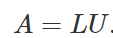

Our system can be written as:

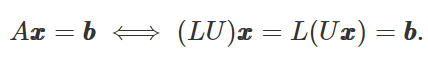

or: 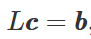



We can use forward substitution to find c in few operations, and then solve a second linear system:
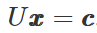

For a given b we can find the corresponding x very efficiently, as long as we can find matrices L and U

This is the **Doolittle Alogirthm**. The first step is to design a lower triangular matrix which, when multiplied by the matrix A produces a version of A which has a value at A[0,0] and zeros in the rest of the column. In this case:

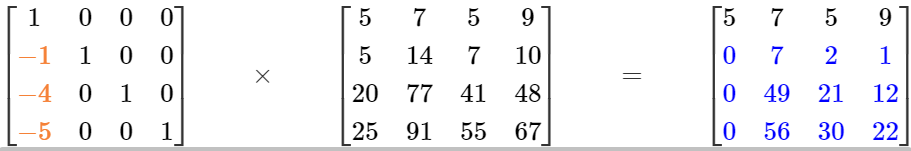


We can keep producing lower triangular matrices (L0, L1, L2) etc. until A is upper triangular, i.e.: 

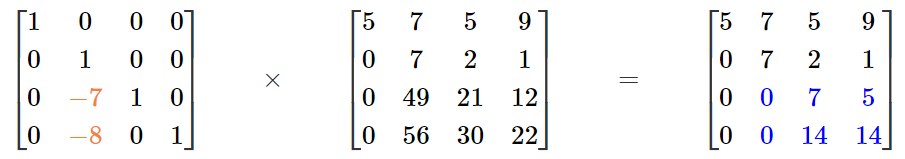

The general formula for a 4x4 matrix can be given as:

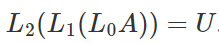

In [5]:
def LU_dec(A):
    #upper triangular matrix contains gaussian elimination result
    #so we need to create a copy
    A = A.copy()
    m, n = A.shape
    #Lower triangualr matrix has identity diagonal 
    L = np.identity(n)
    for k in range(n):
        for i in range(k+1, n):
            #Define the scale factor outside the innermost
            #loop otherwise its value gets changed
            s = (A[i,k]/A[k,k])
            for j in range(k,n):
                A[i,j] = A[i,j] - s*A[k,j]
            L[i,k] = s
    return L,A

In [7]:
A = np.array([[ 5., 7.,   5.,  9.],
              [ 5., 14.,  7., 10.],
              [20., 77., 41., 48.],
              [25., 91. ,55., 67.]])

L, U = LU_dec(A)

print(A)
print(L)
print(U)
print(np.allclose(np.dot(L,U), A))

[[ 5.  7.  5.  9.]
 [ 5. 14.  7. 10.]
 [20. 77. 41. 48.]
 [25. 91. 55. 67.]]
[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [4. 7. 1. 0.]
 [5. 8. 2. 1.]]
[[5. 7. 5. 9.]
 [0. 7. 2. 1.]
 [0. 0. 7. 5.]
 [0. 0. 0. 4.]]
True
